Kappa for XGBoost

Accuracy: 97.2027972027972

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143


Cohen's Kappa Score: 0.9404910528506034

Confusion Matrix:


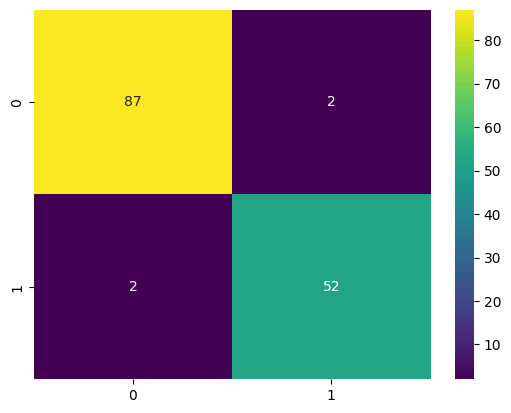


Precision: 0.9775280898876404
Recall: 0.9775280898876404


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data.csv')

# Preprocessing (handle missing values, encode categorical variables if any)
# Assuming the dataset is clean and doesn't contain missing values or categorical variables

# Splitting the dataset into features (X) and target variable (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_train_encoded = label_encoder.fit_transform(y_train)

# Encode the test set labels
y_test_encoded = label_encoder.transform(y_test)

# Train the model
model = XGBClassifier()
model.fit(X_train, y_train_encoded)

# Predicting the target(diagnosis) variable on the testing set
y_pred = model.predict(X_test)

if y_test.dtype == 'object':
    label_encoder = LabelEncoder()
    y_test = label_encoder.fit_transform(y_test)

# Convert y_pred to integer labels if it's categorical
if y_pred.dtype == 'object':
    label_encoder = LabelEncoder()
    y_pred = label_encoder.fit_transform(y_pred)

# Model evaluation
XGB_accuracy = 100 * accuracy_score(y_test, y_pred)
print("Accuracy:", XGB_accuracy)

# Generating the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate Cohen's Kappa value
kappa_score = cohen_kappa_score(y_test, y_pred)
print("\nCohen's Kappa Score:", kappa_score)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
sns.heatmap(cm,annot = True,cmap='viridis')
plt.show()

# Calculate precision and recall
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

precision = TP / (TP + FP) 
# if (TP + FP) > 0 else 0
recall = TP / (TP + FN) 
# if (TP + FN) > 0 else 0

print("\nPrecision:", precision)
print("Recall:", recall)

Kappa for Random forest

Accuracy: 96.5034965034965
Classification Report:
              precision    recall  f1-score   support

           B       0.98      0.97      0.97        89
           M       0.95      0.96      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143


Cohen's Kappa Score: 0.9258836944127709

Confusion Matrix:


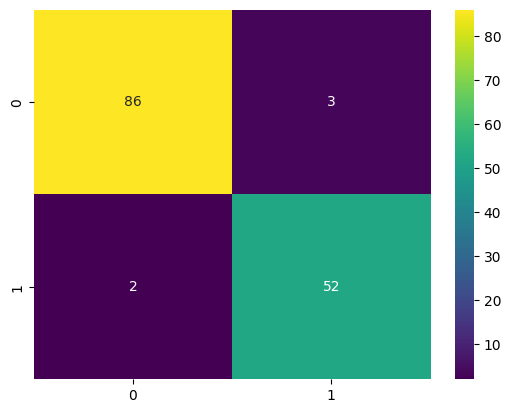


Precision: 0.9662921348314607
Recall: 0.9772727272727273


In [9]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data.csv')

# Separate features and target variable
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Creating and training the Random Forest model
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Predicting the target variable on the testing set
y_pred = model.predict(X_test)

# Model evaluation
random_forest_accuracy = 100 * accuracy_score(y_test, y_pred)
print("Accuracy:", random_forest_accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate Cohen's Kappa value
kappa_score = cohen_kappa_score(y_test, y_pred)
print("\nCohen's Kappa Score:", kappa_score)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
sns.heatmap(cm,annot = True,cmap='viridis')
plt.show()

# Calculate precision and recall
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

precision = TP / (TP + FP) 
# if (TP + FP) > 0 else 0
recall = TP / (TP + FN) 
# if (TP + FN) > 0 else 0

print("\nPrecision:", precision)
print("Recall:", recall)

Kappa for Logistic Regression

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.97      0.98      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143

Accuracy: 96.5034965034965

Cohen's Kappa Score: 0.9247606019151847

Confusion Matrix:


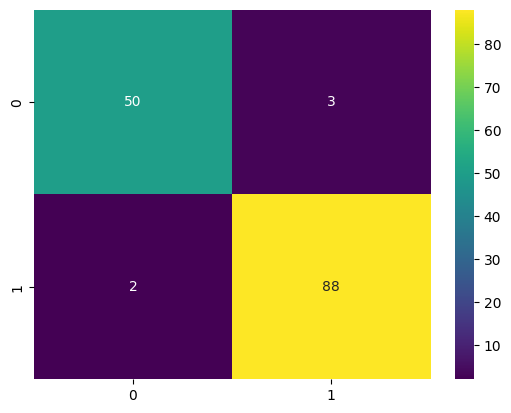


Precision: 0.9433962264150944
Recall: 0.9615384615384616


In [11]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, cohen_kappa_score
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        self.cost_list = []

        # Training
        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            # Cost function (Binary Cross Entropy)
            cost = -(1 / n_features) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
            self.cost_list.append(cost)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y <= 0.5 else 1 for y in y_pred]
        return class_pred

# Load dataset
df = pd.read_csv('data.csv').drop(columns=["id", "Unnamed: 32"])
X = df.drop(columns='diagnosis')
y = np.array([0 if i == "M" else 1 for i in df['diagnosis']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2024, stratify=y)

# Preprocessing data
power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
scaler = MinMaxScaler()

pipe = Pipeline([
    ('transformer', power_transformer),
    ('scaler', scaler)
])

preprocessor = ColumnTransformer([
    ('pipe', pipe, X.columns),
])

preprocessor.fit(X_train)
list_var = [i[6:] for i in preprocessor.get_feature_names_out()]

# Transformed data
X_train_trans = pd.DataFrame(preprocessor.transform(X_train)).set_axis(list_var, axis=1)
X_test_trans = pd.DataFrame(preprocessor.transform(X_test)).set_axis(list_var, axis=1)

# Train model
lr = LogisticRegression(lr=0.01, n_iters=70_000)
lr.fit(X_train_trans, y_train)
pred = lr.predict(X_test_trans)

# Evaluation
print(classification_report(y_true=y_test, y_pred=pred))

logistic_accuracy = 100 * accuracy_score(y_true=y_test, y_pred=pred)
print("Accuracy:", logistic_accuracy)

# Calculate Cohen's Kappa value
kappa_score = cohen_kappa_score(y_test, pred)
print("\nCohen's Kappa Score:", kappa_score)

# Generating the confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=pred)
print("\nConfusion Matrix:")
sns.heatmap(cm,annot = True,cmap='viridis')
plt.show()

# Calculate precision and recall
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

precision = TP / (TP + FP) 
# if (TP + FP) > 0 else 0
recall = TP / (TP + FN) 
# if (TP + FN) > 0 else 0

print("\nPrecision:", precision)
print("Recall:", recall)


Kappa for KNN

Accuracy: 95.8041958041958
Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        89
           M       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143


Cohen's Kappa Score: 0.9107365792759051

Confusion Matrix:


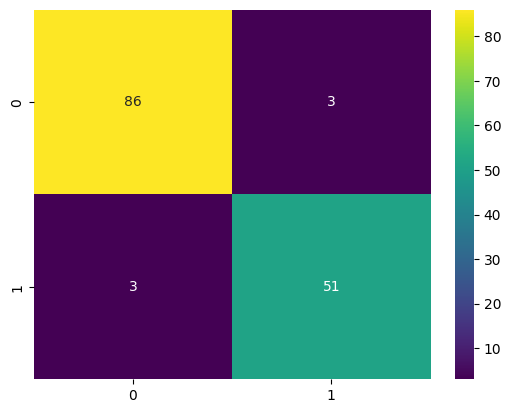


Precision: 0.9662921348314607
Recall: 0.9662921348314607


In [13]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('data.csv')

# Drop columns with all missing values
df.dropna(axis=1, how='all', inplace=True)

# Separate features and target variable
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define column transformer to handle missing values
missing_values_transformer = ColumnTransformer(
    transformers=[
        ('imputer', SimpleImputer(strategy='mean'), X.columns)
    ],
    remainder='passthrough'
)

# Create a pipeline
pipeline = Pipeline(steps=[
    ('missing_values', missing_values_transformer),
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict the target variable on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model
knn_accuracy = 100*accuracy_score(y_test, y_pred)
print("Accuracy:", knn_accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate Cohen's Kappa value
kappa_score = cohen_kappa_score(y_test, y_pred)
print("\nCohen's Kappa Score:", kappa_score)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
sns.heatmap(cm,annot = True,cmap='viridis')
plt.show()

# Calculate precision and recall
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

precision = TP / (TP + FP) 
# if (TP + FP) > 0 else 0
recall = TP / (TP + FN) 
# if (TP + FN) > 0 else 0

print("\nPrecision:", precision)
print("Recall:", recall)

Kappa For Bagging

Accuracy: 95.1048951048951
Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.96      0.96        89
           M       0.93      0.94      0.94        54

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143


Cohen's Kappa Score: 0.8962371721778791

Confusion Matrix:


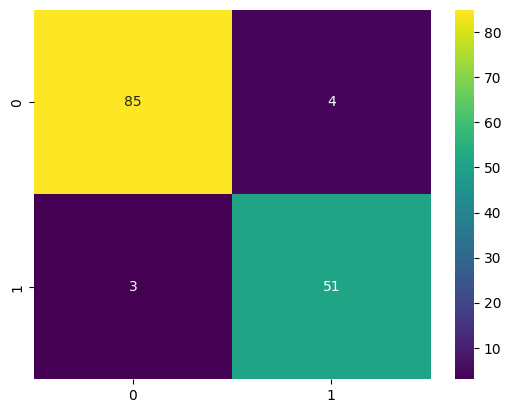


Precision: 0.9550561797752809
Recall: 0.9659090909090909


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Upload the dataset
df = pd.read_csv('data.csv')

# Step 2: Preprocess the data (if needed)
# No preprocessing required as the dataset is clean

# Step 3: Split the data into features (X) and target variable (y)
X = df.drop(columns=['diagnosis'])  # Assuming 'diagnosis' is the target variable
y = df['diagnosis']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 5: Create a Bagging Classifier with a Decision Tree base estimator
base_estimator = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_estimator, n_estimators=10, random_state=42)


# Step 6: Train the model
bagging_classifier.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = bagging_classifier.predict(X_test)
bagging_accuracy = 100*accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", bagging_accuracy)
print("Classification Report:\n", report)

# Calculate Cohen's Kappa value
kappa_score = cohen_kappa_score(y_test, y_pred)
print("\nCohen's Kappa Score:", kappa_score)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
sns.heatmap(cm,annot = True,cmap='viridis')
plt.show()

# Calculate precision and recall
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

precision = TP / (TP + FP) 
# if (TP + FP) > 0 else 0
recall = TP / (TP + FN) 
# if (TP + FN) > 0 else 0

print("\nPrecision:", precision)
print("Recall:", recall)